# Question 2

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

%matplotlib inline

hw5data = np.loadtxt('hw5data.mat')

#### a)

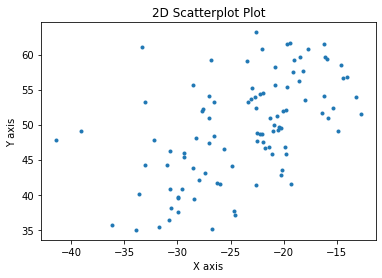

In [2]:
#i)
matplotlib.pyplot.scatter(hw5data[0], hw5data[1], marker = '.')
plt.title('2D Scatterplot Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.savefig('hw5-3a.jpg')

In [3]:
#ii)
mean = np.mean(hw5data, axis = 1)
mean = mean[:, None]

In [4]:
mean

array([[-23.78989551],
       [ 49.46199088]])

In [5]:
mean.shape

(2, 1)

In [6]:
#iii)
N = np.shape(hw5data)[1]
Z = hw5data - mean
np.mean(Z, axis = 1)
covmatrix = Z@Z.T / N
covmatrix.shape

(2, 2)

In [7]:
covmatrix

array([[34.65672591, 22.54958275],
       [22.54958275, 52.00402712]])

#### b)

In [8]:
#i)
old_eig_V, old_V = np.linalg.eig(covmatrix) #this is better than "V" as it isolates the vals

In [9]:
old_eig_V

array([19.17016342, 67.49058962])

In [10]:
old_V

array([[-0.82431958, -0.56612474],
       [ 0.56612474, -0.82431958]])

In [11]:
#ii)
maxcol = list(old_eig_V).index(max(old_eig_V))
eigenvect = old_V[:,maxcol]
print(eigenvect)

[-0.56612474 -0.82431958]


In [12]:
#iii)
mincol = list(old_eig_V).index(min(old_eig_V))
eigenvect = old_V[:,mincol]
print(eigenvect)

[-0.82431958  0.56612474]


In [13]:
#iv)
def eigsort(V, eigvals): #provided code
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [14]:
#iv)
new_V, new_eig_V = eigsort(old_V, old_eig_V)

In [15]:
#iv)
# The columns of the matrix of unsorted eigemvectors are now the 
# rows of the matrix of sorted eigenvectors
# The matrix of sorted eigenvectors is a transpose of the matrix of unsorted eigenvectors
print(old_V)
print(new_V)

[[-0.82431958 -0.56612474]
 [ 0.56612474 -0.82431958]]
[[-0.56612474 -0.82431958]
 [-0.82431958  0.56612474]]


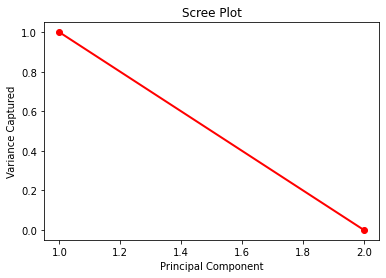

[1.0000000e+00 2.7193043e-32]


In [16]:
#v)
pca = PCA(n_components = 2)
pca_fit = pca.fit(hw5data)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured')
plt.show()

#The code below shows that the first principal component explains approximately 100% of the
#total variation in the dataset while the second principal component explains an infinitely
#small number that approximates 0% of the total variation in the dataset.
print(pca.explained_variance_ratio_)

#### c)

In [17]:
#i)
new_coordinates = new_V.T.dot(np.array([[-35], [40]]) - mean)
print(new_coordinates)

[[14.1460219 ]
 [ 3.88404151]]


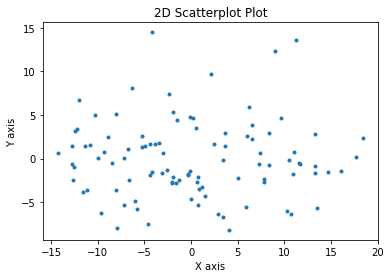

In [18]:
#ii)
C = new_V.T.dot(hw5data - mean)
matplotlib.pyplot.scatter(C[0], C[1], marker = '.')
plt.title('2D Scatterplot Plot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.savefig('hw5-3c.jpg')

In [19]:
#iii) The hw5-3c scatterplot is a rotated version of the hw5-3a scatterplot with it being
#rotated approximately 45 degrees so that the new scatterplot is aligned with the new x axis
#that matches up with the first principal component direction (or the direction of greater
#projected variance).

#### d)

In [20]:
hw5bdata = sio.loadmat('hw5bdata.mat')
faces = hw5bdata['faces']
dog = hw5bdata['dog']
x = hw5bdata['x']

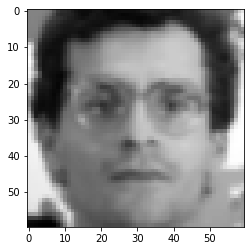

In [21]:
def viewcolumn(columnvector):
    plt.imshow(columnvector.reshape([60, 60], order='F'), cmap=plt.get_cmap('gray'))
#i)
viewcolumn(faces[:, 4])

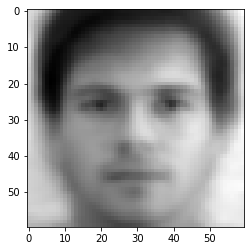

In [22]:
#ii)
mean_face = np.mean(faces, axis = 1)
mean_face = mean_face[:, np.newaxis]
viewcolumn(mean_face)

In [23]:
#iii)
A = faces - np.matlib.repmat(mean_face, 1, 48)

In [24]:
#iv)
eigenvalues, V_old = np.linalg.eig(A.T.dot(A))

In [25]:
#v)
V, D = eigsort(V_old, eigenvalues)

In [26]:
#vi)
U = A.dot(V)

In [27]:
#vii)
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

U = normc(U)

#### e)

In [28]:
# This code makes use of matrix multiplication and the np.dot() function (which performs the
# dot product of two arrays). To calculate the dot product we use the indexed column from 
#the previous question and we use np.newaxis to increase the dimension of the existing 
#array by another dimension and subtract the mean_face from it so that we get the new data-
#aligned coordinate space. All of this is assigned to 'c' and it is the principal component
#coordinates.
c = U.T.dot(faces[:, 4][:, np.newaxis] - mean_face)

#### f)

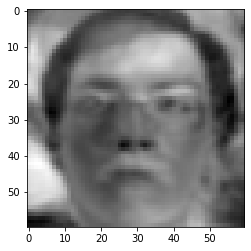

In [29]:
#i)
viewcolumn(U[:, 2])
plt.savefig('hw5F1.jpg')

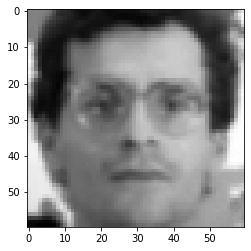

In [30]:
#ii)
Z = U.dot(c) + mean_face
viewcolumn(Z)

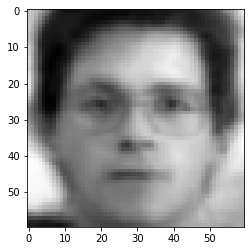

In [31]:
#iii)
Z = U[:, :10].dot(c[:10, :]) + mean_face
viewcolumn(Z)
plt.savefig('hw5F3.jpg')

#### g)

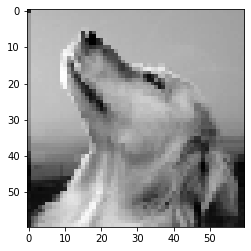

In [32]:
#i)
viewcolumn(dog)

In [33]:
#ii)
c = U.T.dot(dog - mean_face)

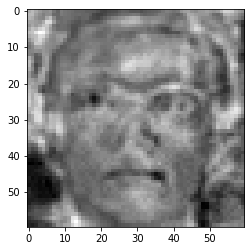

In [34]:
#iii)
Z = U.dot(c) + mean_face
viewcolumn(Z)
plt.savefig('hw4H.jpg')

In [35]:
#iv)
# It does not look like the original picture at all. The reconstruction finds the closest
# image to match in the face space, so when using the image of the dog, it becomes very
# apparent that the dog does not lie in the face space (it's not even close to it).

#### h)

In [36]:
#i)
newfaces = np.delete(faces,np.s_[3:6],axis=1)
mean_newface = np.mean(newfaces, axis=1)
mean_newface = mean_newface[:, np.newaxis]
R = newfaces - repmat(mean_newface, 1, 45)
eigenvalues, V_old = np.linalg.eig(R.T.dot(R))
V, D = eigsort(V_old, eigenvalues)
U = R.dot(V)
U = normc(U)

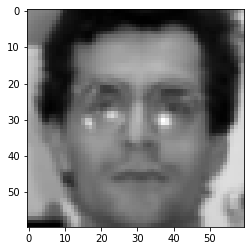

In [37]:
#ii)
viewcolumn(faces[:, 3])
plt.savefig('hw5H2')

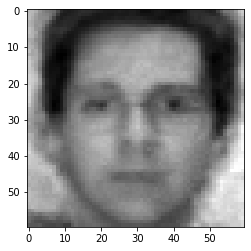

In [38]:
#iii)
c = U.T.dot(faces[:, 3][:, np.newaxis] - mean_newface)
Z = U.dot(c) + mean_newface
viewcolumn(Z)
plt.savefig('hw5H3')

In [40]:
#iv)
# I think while the face space represents faces much better than the dog, it still isn't 
# absolutely perfect. When the faces that were not in the first data space are aligned the
# same way as the original data, the face space represents the faces fairly decently, but it
# would be interesting to see the faces aligned in a way that is not the same as previous
# data.